<a href="https://colab.research.google.com/github/angsoto88/Portafolio/blob/main/Python/Ventas_BMW_2010_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introducción

El mercado automotriz global ha experimentado transformaciones significativas en los últimos años, impulsadas por cambios económicos, sociales y tecnológicos. BMW, como marca premium, se encuentra en una posición estratégica que le permite captar tendencias tanto en vehículos de combustión como en híbridos y eléctricos.

Este análisis tiene como objetivo **explorar el comportamiento de las ventas de BMW entre 2010 y 2024**, identificando patrones regionales, evolución temporal y diferencias por modelo. Además, se busca comprender cómo factores globales, como la pandemia de 2020 o el auge de la movilidad sostenible, impactaron el desempeño de la marca.

# 2. Preparación del entorno y carga de datos

En esta sección se cargan las librerías necesarias para análisis y visualización (pandas, numpy, matplotlib, seaborn) y se importa el dataset BMW sales data (2010–2024).

Las variables incluidas son:



*   **Model:** modelo del vehículo.
*   **Year:** año de venta.
*   **Region:** región geográfica.
*   **Color, Fuel_Type, Transmission:** características del vehículo.
*   **Engine_Size_L, Mileage_KM, Price_USD:** especificaciones técnicas y económicas.
*   **Sales_Volume:** volumen de ventas.
*   **Sales_Classification:** clasificación de las ventas (alta o baja).







In [ ]:
from google.colab import files

uploaded = files.upload()


Saving BMW sales data (2010-2024).csv to BMW sales data (2010-2024).csv


In [ ]:
#Importar librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar dataset
#Para archivos almacenados en formato CSV: pd.read_csv
#df objeto del tipo DataFrame
df = pd.read_csv("BMW sales data (2010-2024).csv")
df


,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low
...,...,...,...,...,...,...,...,...,...,...,...
49995,i3,2014,Asia,Red,Hybrid,Manual,4.6,151030,42932,8182,High
49996,i3,2023,Middle East,Silver,Electric,Manual,4.2,147396,48714,9816,High
49997,5 Series,2010,Middle East,Red,Petrol,Automatic,4.5,174939,46126,8280,High
49998,i3,2020,Asia,White,Electric,Automatic,3.8,3379,58566,9486,High


# 3. Exploración inicial

Antes de profundizar en el análisis, se revisa la estructura del dataset:

- 50.000 registros y 11 variables.
- No existen valores nulos.
- Los datos abarcan el periodo 2010–2024.

Las estadísticas básicas muestran que el precio promedio ronda los **75.000 USD**, mientras que el volumen de ventas por modelo varía ampliamente, desde unidades con ventas reducidas hasta modelos con más de **9.000 unidades vendidas** anualmente.


In [ ]:
df.shape # Dimensión del dataset

(50000, 11)

In [ ]:
df.columns

Index(['Model', 'Year', 'Region', 'Color', 'Fuel_Type', 'Transmission',
       'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume',
       'Sales_Classification'],
      dtype='object')

In [ ]:
df.head(1) #Ver la primera fila del dataset

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High


In [ ]:
df.info()  # Identificar tipos de datos y columnas.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


**3.1 Variables Númericas**

In [ ]:
df.describe() # Obtener estadísticas básicas.

,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2017.015700,3.247180,100307.203140,75034.600900,5067.514680
std,4.324459,1.009078,57941.509344,25998.248882,2856.767125
min,2010.000000,1.500000,3.000000,30000.000000,100.000000
25%,2013.000000,2.400000,50178.000000,52434.750000,2588.000000
50%,2017.000000,3.200000,100388.500000,75011.500000,5087.000000
75%,2021.000000,4.100000,150630.250000,97628.250000,7537.250000
max,2024.000000,5.000000,199996.000000,119998.000000,9999.000000


In [ ]:
df.isnull().sum() # Detectar valores nulos.

,0
Model,0
Year,0
Region,0
Color,0
Fuel_Type,0
Transmission,0
Engine_Size_L,0
Mileage_KM,0
Price_USD,0
Sales_Volume,0


**3.2 Variables Categóricas**

---
Propósito:
- Devuelve un array con todos los modelos de BMW presentes en el dataset, sin repeticiones
- Devuelve las regiones geográficas donde se realizaron las ventas.
- Devuelve las categorías de clasificación de ventas.
- Devuelve los tipos de transmisión de los vehículos vendidos


In [ ]:
df.Model.unique()

array(['5 Series', 'i8', 'X3', '7 Series', 'M5', '3 Series', 'X1', 'M3',
       'X5', 'i3', 'X6'], dtype=object)

In [ ]:
df.Region.unique()

array(['Asia', 'North America', 'Middle East', 'South America', 'Europe',
       'Africa'], dtype=object)

In [ ]:
df.Sales_Classification.unique()

array(['High', 'Low'], dtype=object)

In [ ]:
df.Transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

# 4. Análisis exploratorio

**4.1 Distribución de ventas por Región**



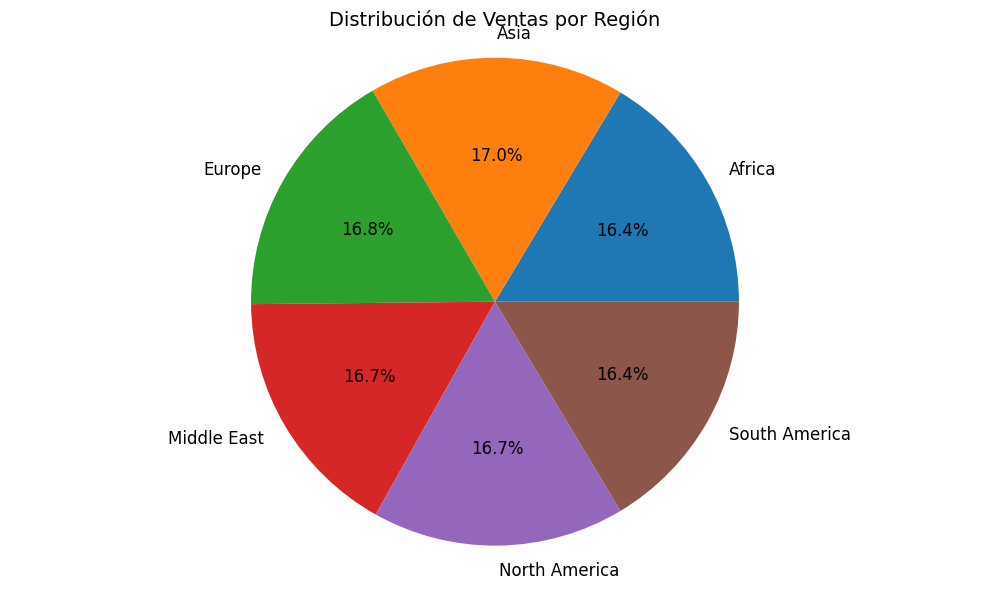

In [ ]:
# Agrupar ventas por región
region_sales_value = df.groupby("Region")["Sales_Volume"].sum().reset_index()

# Crear figura antes del gráfico
plt.figure(figsize=(10,6))

# Gráfico de pastel
plt.pie(
    region_sales_value["Sales_Volume"],
    labels=region_sales_value["Region"],
    autopct="%1.1f%%",
    textprops={'color': 'black', 'fontsize': 12},  # Porcentajes en blanco
    colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']  # Colores personalizados
)

# Título y formato
plt.title("Distribución de Ventas por Región", fontsize=14)
plt.axis('equal')  # Mantiene el gráfico circular
plt.tight_layout()
plt.show()


Asia representa el mercado más fuerte para la marca, lo que responde a su tradición en vehículos premium y a una red de concesionarios consolidada. América del Norte, aunque menor en volumen, se mantiene como un mercado clave para los SUV y deportivos. En contraste, Asia, con menor participación actual, muestra un crecimiento sostenido que refleja la expansión de la clase media y la preferencia por vehículos de lujo en mercados emergentes como China e India.


**4.2 Ventas por modelo**


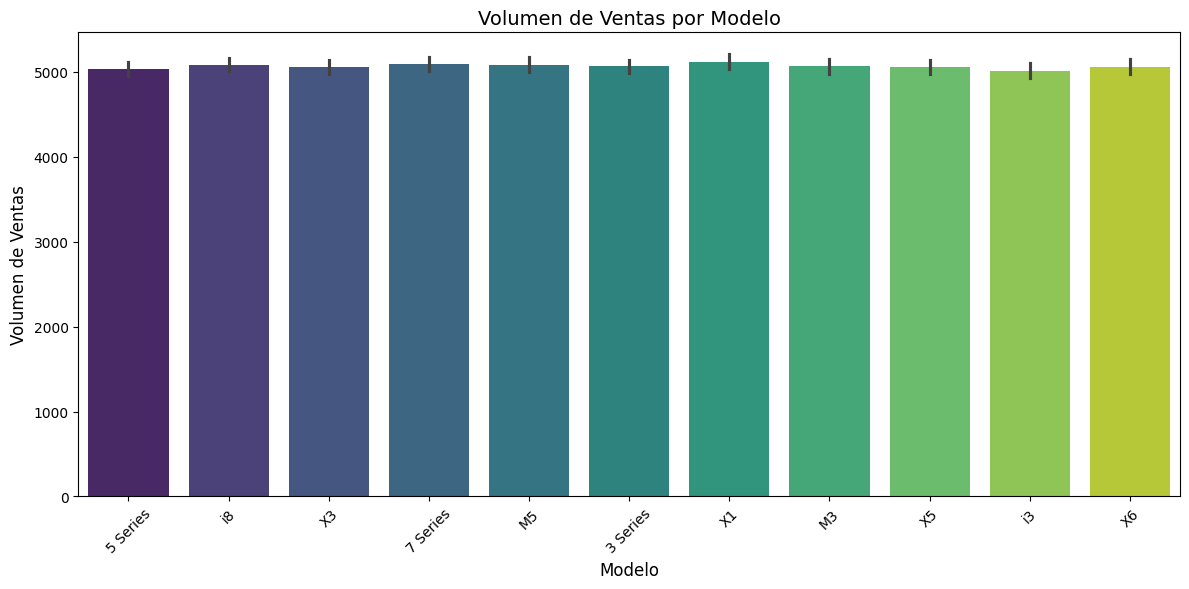

In [ ]:
plt.figure(figsize=(12,6))

# Usar hue igual a x y desactivar la leyenda
sns.barplot(
    data=df,
    x="Model",
    y="Sales_Volume",
    hue="Model",                # Asignar hue igual a x
    palette="viridis",          # Paleta de colores
    dodge=False                 # Evita separación de barras
)

# Ocultar la leyenda (ya que hue = x)
plt.legend([],[], frameon=False)

# Estética
plt.title("Volumen de Ventas por Modelo", fontsize=14)
plt.xlabel("Modelo", fontsize=12)
plt.ylabel("Volumen de Ventas", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


El análisis por modelo revela que la Serie 5 lidera las ventas, consolidándose como el producto insignia de la marca en el segmento ejecutivo. Modelos como la Serie 3 y X5 también tienen un peso importante, mientras que los eléctricos como el i3 muestran volúmenes menores pero con tendencia ascendente.


**4.3 Evolución de ventas por año**

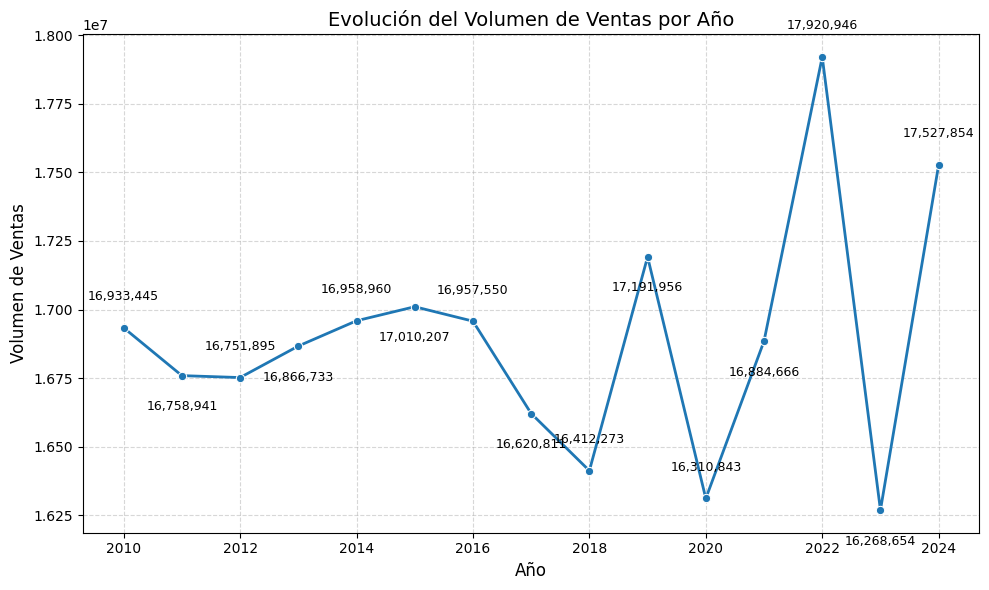

In [ ]:
# Agrupar por año
yearly_sales = df.groupby("Year")["Sales_Volume"].sum().reset_index()

# Crear figura
plt.figure(figsize=(10,6))
sns.lineplot(data=yearly_sales, x="Year", y="Sales_Volume", marker="o", linewidth=2, color="#1f77b4")

# Ajuste fino: etiquetas intercaladas más cerca de los puntos
for i, (x, y) in enumerate(zip(yearly_sales["Year"], yearly_sales["Sales_Volume"])):
    offset = yearly_sales["Sales_Volume"].max() * 0.005  # Más pequeño que antes
    if i % 2 == 0:
        plt.text(x, y + offset, f'{y:,}', ha='center', va='bottom', fontsize=9, color='black')
    else:
        plt.text(x, y - offset, f'{y:,}', ha='center', va='top', fontsize=9, color='black')

# Título y formato
plt.title("Evolución del Volumen de Ventas por Año", fontsize=14)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Volumen de Ventas", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


La caída de 2020 se explica en gran parte por la pandemia, que interrumpió cadenas de suministro y redujo la demanda global de bienes de lujo. No obstante, la recuperación posterior confirma la resiliencia del mercado automotriz premium. La tendencia al alza en los últimos años también refleja el repunte económico global y la creciente preferencia por vehículos de alta gama.


**4.4 Análisis regional compuesto**

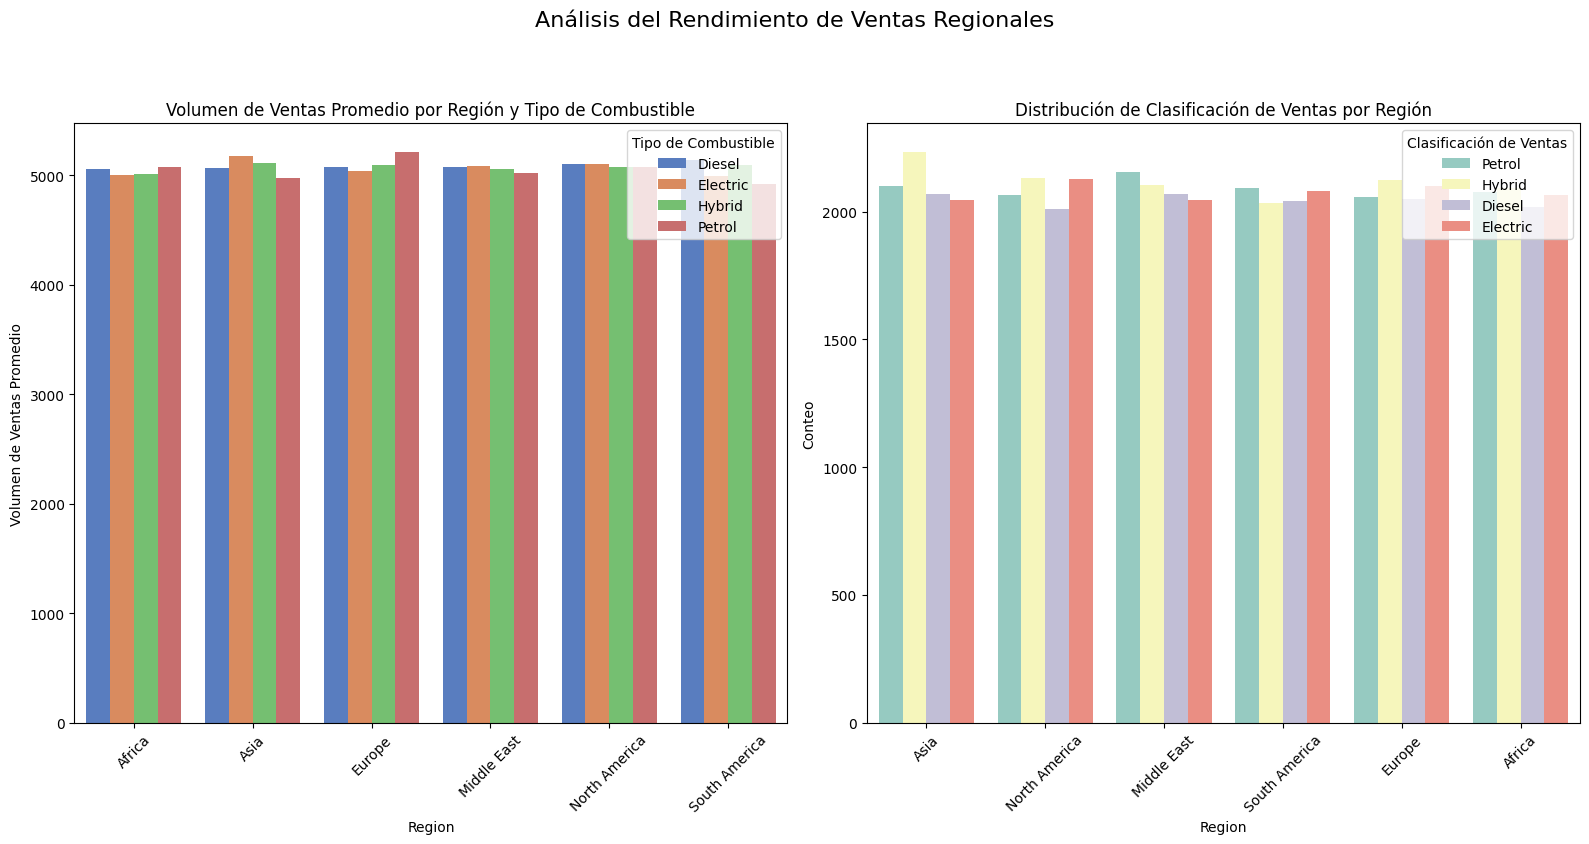

In [ ]:
# Enhanced regional analysis
plt.figure(figsize=(16, 8))

# Sales by region and fuel type
plt.subplot(1, 2, 1)
agg_df = df.groupby(['Region', 'Fuel_Type'])['Sales_Volume'].mean().reset_index()
sns.barplot(x='Region',
            y='Sales_Volume',
            hue='Fuel_Type',
            data=agg_df,
            palette='muted')
plt.title('Volumen de Ventas Promedio por Región y Tipo de Combustible', fontsize=12)
plt.xlabel('Region')
plt.ylabel('Volumen de Ventas Promedio')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Combustible')

# Sales classification by region
plt.subplot(1, 2, 2)
sns.countplot(x='Region',
              hue='Fuel_Type',
              data=df,
              palette='Set3')
plt.title('Distribución de Clasificación de Ventas por Región', fontsize=12)
plt.xlabel('Region')
plt.ylabel('Conteo')
plt.xticks(rotation=45)
plt.legend(title='Clasificación de Ventas')

plt.suptitle('Análisis del Rendimiento de Ventas Regionales', y=1.05, fontsize=16)
plt.tight_layout()
plt.show()


El desglose por región y tipo de combustible evidencia que en Europa y Norteamérica aún predominan los vehículos de combustión, aunque los híbridos y eléctricos empiezan a ganar cuota. En Asia y Medio Oriente, el crecimiento de los eléctricos es más acelerado.